In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [3]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [4]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1), dtype=torch.float)

In [5]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [6]:
y = 2*X + 1 + e

In [7]:
y

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])

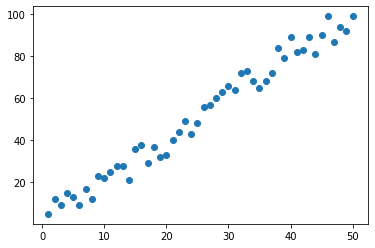

In [8]:
plt.scatter(X.numpy(), y.numpy())

In [9]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [10]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [11]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear)

Linear(in_features=1, out_features=1, bias=True)


In [12]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [13]:
for name, param in model.named_parameters():
    print(name,'\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [14]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [15]:
x1 = np.linspace(0.0, 50.0, 50)

In [16]:
w1 = 0.10597
b1 = 0.96379

In [17]:
y1 = w1 * x1 + b1

In [18]:
y1

array([0.96379   , 1.07192265, 1.18005531, 1.28818796, 1.39632061,
       1.50445327, 1.61258592, 1.72071857, 1.82885122, 1.93698388,
       2.04511653, 2.15324918, 2.26138184, 2.36951449, 2.47764714,
       2.5857798 , 2.69391245, 2.8020451 , 2.91017776, 3.01831041,
       3.12644306, 3.23457571, 3.34270837, 3.45084102, 3.55897367,
       3.66710633, 3.77523898, 3.88337163, 3.99150429, 4.09963694,
       4.20776959, 4.31590224, 4.4240349 , 4.53216755, 4.6403002 ,
       4.74843286, 4.85656551, 4.96469816, 5.07283082, 5.18096347,
       5.28909612, 5.39722878, 5.50536143, 5.61349408, 5.72162673,
       5.82975939, 5.93789204, 6.04602469, 6.15415735, 6.26229   ])

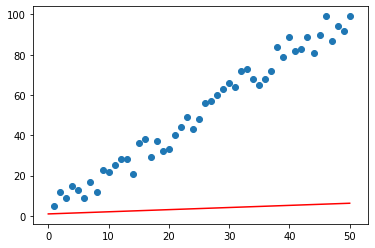

In [19]:
plt.plot(x1,y1,'r')
plt.scatter(X.numpy(), y.numpy())

In [20]:
criterion = nn.MSELoss() # The criteria which you are evaluating your function

In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [22]:
# Training the model

In [25]:
epochs = 50
losses = []

for epoch in range(epochs):
    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    
    losses.append(loss)
    
    print(f"Epoch [{epoch+1}/{epochs}]. Loss : {loss.item()} weight : {model.linear.weight.item()} biase : {model.linear.bias.item()}")
    print("Epoch [{}/{}]. Loss : {.3f}".format(epoch+1,epochs, loss))
    
    # Reset the stored gradient for each epoch
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

Epoch [1/50]. Loss : 3057.216796875 weight : 0.10597813129425049 biase : 0.9637961387634277
Epoch [2/50]. Loss : 1588.5308837890625 weight : 3.334900379180908 biase : 1.0604636669158936
Epoch [3/50]. Loss : 830.3001708984375 weight : 1.0148327350616455 biase : 0.9922627806663513
Epoch [4/50]. Loss : 438.8524169921875 weight : 2.6817996501922607 biase : 1.0425218343734741
Epoch [5/50]. Loss : 236.7615203857422 weight : 1.4840211868286133 biase : 1.0076650381088257
Epoch [6/50]. Loss : 132.4291229248047 weight : 2.3446059226989746 biase : 1.0339646339416504
Epoch [7/50]. Loss : 78.56573486328125 weight : 1.7262253761291504 biase : 1.0163217782974243
Epoch [8/50]. Loss : 50.75775909423828 weight : 2.170504093170166 biase : 1.0302516222000122
Epoch [9/50]. Loss : 36.4012336730957 weight : 1.8512457609176636 biase : 1.0214954614639282
Epoch [10/50]. Loss : 28.98923110961914 weight : 2.0806007385253906 biase : 1.029038906097412
Epoch [11/50]. Loss : 25.16238784790039 weight : 1.9157683849334

Text(0.5, 0, 'Epoch ')

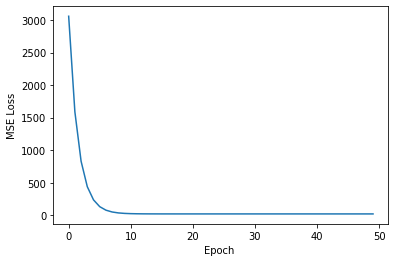

In [26]:
plt.plot(range(epochs), losses)
plt.ylabel("MSE Loss")
plt.xlabel("Epoch ")

In [27]:
x = np.linspace(0.0, 50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight * x + current_bias

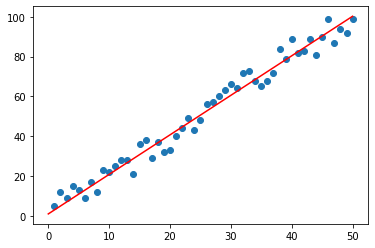

In [28]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x,predicted_y, 'r')